# Understanding AI, ML, and DL

In this notebook, we'll explore the definitions of Artificial Intelligence (AI), Machine Learning (ML), and Deep Learning (DL) in simple terms. These concepts are often used interchangeably, but they have distinct meanings and applications.

## What is AI?

**Artificial Intelligence (AI)** is a broad field of computer science focused on creating systems that can perform tasks that typically require human intelligence. These tasks include problem-solving, understanding language, recognizing patterns, and making decisions.

### Key Points:
- **Goal**: To simulate human intelligence in machines.
- **Applications**: Virtual assistants (like Siri or Alexa), recommendation systems, and autonomous vehicles.
- **Types**: 
  - **Narrow AI**: Designed for a specific task (e.g., facial recognition).
  - **General AI**: Aims to perform any intellectual task that a human can do (still largely theoretical).

## What is ML?

**Machine Learning (ML)** is a subset of AI that involves training algorithms to learn from and make predictions or decisions based on data. Instead of being explicitly programmed to perform a task, ML models learn from examples.

### Key Points:
- **Goal**: To enable machines to learn from data and improve over time.
- **Process**: Involves feeding data into algorithms to create models that can make predictions or decisions.
- **Applications**: Spam filtering, fraud detection, and personalized recommendations.

## What is DL?

**Deep Learning (DL)** is a specialized subset of ML that uses neural networks with many layers (hence "deep") to analyze various factors of data. It is particularly effective for complex tasks like image and speech recognition.



### Supervised Learning Algorithms

- **Definition**: Supervised learning algorithms are a type of machine learning where the model is trained on a labeled dataset. This means that each training example is paired with an output label, and the algorithm learns to map inputs to the correct output.

- **Purpose**: The goal is to learn a function that makes predictions about unseen data by generalizing from the training data.

### Classification Algorithms

- **Definition**: Classification algorithms are a subset of supervised learning used to predict categorical labels. The output is discrete, meaning the model assigns input data to one of several predefined categories.

- **When Used**: 
  - When the output variable is categorical (e.g., yes/no, spam/ham, disease/no disease).
  - In scenarios where decision-making is based on distinct classes.

- **Value**:
  - **Decision-Making**: Helps automate decision processes by classifying data into categories.
  - **Efficiency**: Reduces the need for manual sorting and categorization.
  - **Accuracy**: Provides a systematic approach to predict outcomes based on historical data.

- **Example Problems**:
  - **Spam Detection**: Classifying emails as spam or not spam.
  - **Medical Diagnosis**: Predicting whether a patient has a certain disease.
  - **Sentiment Analysis**: Determining if a review is positive or negative.
  - **Image Recognition**: Identifying objects or people in images.

### Types of Classification Algorithms

1. **Logistic Regression**:
   - Used for binary classification problems.
   - Models the probability of a class using a logistic function.

2. **Decision Trees**:
   - Uses a tree-like model of decisions.
   - Splits data into branches to make predictions.

3. **Random Forest**:
   - An ensemble of decision trees.
   - Improves accuracy by averaging multiple trees.

4. **Support Vector Machines (SVM)**:
   - Finds the hyperplane that best separates classes.
   - Effective in high-dimensional spaces.

5. **K-Nearest Neighbors (KNN)**:
   - Classifies based on the majority class among the k-nearest neighbors.
   - Simple and effective for small datasets.

6. **Naive Bayes**:
   - Based on Bayes' theorem.
   - Assumes independence between features.

7. **Neural Networks**:
   - Composed of layers of interconnected nodes.
   - Capable of capturing complex patterns.

8. **CatBoost, LightGBM, XGBoost**:
   - Gradient boosting algorithms.
   - Known for high performance and efficiency.

### Significance

- **Versatility**: Can be applied to a wide range of domains and problems.
- **Predictive Power**: Provides insights and predictions that can drive business and operational decisions.
- **Automation**: Reduces human effort in data analysis and decision-making processes.


###  Problem Statement - Classify Tumor
- **Discrete Outcomes**: The problem involves predicting whether a tumor is malignant or benign, which are distinct categories, making it a classification problem.

- **Classification**: Since there are only two possible outcomes (malignant or benign), this fits the  classification framework.

- **Decision-Making**: The goal is to automate the decision process of classifying tumors based on input features, which is a hallmark of classification tasks.

- **Medical Diagnosis**: Similar to other medical diagnosis problems, it involves categorizing based on symptoms or features, aligning with classification methodologies.

- **Predictive Modeling**: The task requires learning from labeled data (historical diagnoses) to predict future cases, a key aspect of supervised classification.

In [127]:
#import libraries

In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime



In [3]:
df_labevents=pd.read_csv("demo/LABEVENTS.csv")

In [4]:
df_admissions=pd.read_csv("demo/ADMISSIONS.csv")

In [5]:
df_icu=pd.read_csv("demo/ICUSTAYS.csv")

In [6]:
df_d_labitems=pd.read_csv("demo/D_LABITEMS.csv")

In [7]:
df_adm_lab1=pd.merge(df_labevents,df_d_labitems, on=['itemid'] , how='inner')

In [8]:
df_adm_lab1.head(2)

,row_id_x,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,row_id_y,label,fluid,category,loinc_code
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN,83,Bicarbonate,Blood,Chemistry,1963-8


-Remove unwanted columns

In [9]:
del df_adm_lab1['valuenum']
del df_adm_lab1['valueuom']
del df_adm_lab1['row_id_y']
del df_adm_lab1['fluid']
del df_adm_lab1['category']
del df_adm_lab1['loinc_code']

In [10]:
del df_adm_lab1['charttime']
del df_adm_lab1['itemid']

 Create a pivot table from the DataFrame 'df_adm_lab1'
 - 'index' specifies the columns to use as the new index for the pivot table
 - 'columns' specifies the column whose unique values will become the new columns
 - 'values' specifies the column whose values will fill the new table
 - 'aggfunc' is the function to apply to the grouped data, 'first' takes the first occurrence



 Reset the index of the pivot table to convert it back to a regular DataFrame
 This makes the DataFrame look more like a flat file, with the index as columns



In [11]:
df_adm_lab1_pivot = df_adm_lab1.pivot_table(index=['subject_id', 'hadm_id', 'row_id_x','flag'],
                          columns='label',
                          values='value',
                          aggfunc='first')  

# Reset the index to make it look more like a flat file
df_adm_lab1_pivot.reset_index(inplace=True)


In [12]:
df_adm_lab1_pivot

label,subject_id,hadm_id,row_id_x,flag,% Hemoglobin A1c,25-OH Vitamin D,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Alpha-Fetoprotein,...,WBC Count,"WBC, Ascites","WBC, Other Fluid","WBC, Pleural",White Blood Cells,Young Cells,pCO2,pH,pO2,tacroFK
0,10006,142345.0,6245198,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10006,142345.0,6245201,abnormal,NaN,NaN,NaN,NaN,167,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10006,142345.0,6245206,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10006,142345.0,6245209,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10006,142345.0,6245210,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,44228,103379.0,20452675,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24349,44228,103379.0,20452676,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24350,44228,103379.0,20452680,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24351,44228,103379.0,20452682,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Join admissions with the generated pivot table (df_adm_lab1_pivot - table which provides details about the patients and their lab results depicted in separate columns for each of the tests)

In [17]:
df_adm_lab=pd.merge(df_admissions,df_adm_lab1_pivot, on=['subject_id','hadm_id'] , how='inner')

In [18]:
df_adm_lab.columns

Index(['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime',
       'deathtime', 'admission_type', 'admission_location',
       'discharge_location', 'insurance',
       ...
       'WBC Count', 'WBC, Ascites', 'WBC, Other Fluid', 'WBC, Pleural',
       'White Blood Cells', 'Young Cells', 'pCO2', 'pH', 'pO2', 'tacroFK'],
      dtype='object', length=174)

In [ ]:
del df_adm_lab['admittime']
del df_adm_lab['dischtime']
del df_adm_lab['admission_location']
del df_adm_lab['discharge_location']
del df_adm_lab['language']
del df_adm_lab['religion']
del df_adm_lab['edregtime']
del df_adm_lab['edouttime']
del df_adm_lab['has_chartevents_data']
del df_adm_lab['row_id_x']

In [ ]:
df_adm_lab_icu=pd.merge(df_adm_lab,df_icu, on=['subject_id','hadm_id'] , how='left')

In [21]:
df_adm_lab_icu.columns

Index(['row_id_x', 'subject_id', 'hadm_id', 'deathtime', 'admission_type',
       'insurance', 'marital_status', 'ethnicity', 'diagnosis',
       'hospital_expire_flag',
       ...
       'row_id_y', 'icustay_id', 'dbsource', 'first_careunit', 'last_careunit',
       'first_wardid', 'last_wardid', 'intime', 'outtime', 'los'],
      dtype='object', length=174)

- Remove unwanted columns

In [22]:
del df_adm_lab_icu['row_id_y']
del df_adm_lab_icu['dbsource']
del df_adm_lab_icu['first_careunit']
del df_adm_lab_icu['last_careunit']
del df_adm_lab_icu['first_wardid']
del df_adm_lab_icu['last_wardid']
del df_adm_lab_icu['intime']
del df_adm_lab_icu['outtime']

- Create icu_flag column with a value as 1 if icu is availed else 0

In [23]:
df_adm_lab_icu['icu_flag'] = df_adm_lab_icu['icustay_id'].apply(lambda x: 1 if pd.notna(x) else 0)

In [25]:
del df_adm_lab_icu['icustay_id']
del df_adm_lab_icu['deathtime']


In [28]:
df_adm_lab_icu.columns

Index(['row_id_x', 'admission_type', 'insurance', 'marital_status',
       'ethnicity', 'diagnosis', 'hospital_expire_flag', 'flag',
       '% Hemoglobin A1c', '25-OH Vitamin D',
       ...
       'WBC, Other Fluid', 'WBC, Pleural', 'White Blood Cells', 'Young Cells',
       'pCO2', 'pH', 'pO2', 'tacroFK', 'los', 'icu_flag'],
      dtype='object', length=163)

In [ ]:
del df_adm_lab_icu['subject_id']
del df_adm_lab_icu['hadm_id']

In [30]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import LabelEncoder

- Replace any missing values in the DataFrame `df2` with the string '0'.
- This ensures that there are no NaN values, which can be important for data processing and analysis.

In [66]:
df2=df_adm_lab_icu[:]
df2 = df2.fillna('0')

In [67]:
df2.head(5)

,row_id_x,admission_type,insurance,marital_status,ethnicity,diagnosis,hospital_expire_flag,flag,% Hemoglobin A1c,25-OH Vitamin D,...,"WBC, Other Fluid","WBC, Pleural",White Blood Cells,Young Cells,pCO2,pH,pO2,tacroFK,los,icu_flag
0,12258,EMERGENCY,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,abnormal,0,0,...,0,0,0,0,0,0,0,0,1.6325,1
1,12258,EMERGENCY,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,abnormal,0,0,...,0,0,0,0,0,0,0,0,1.6325,1
2,12258,EMERGENCY,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,abnormal,0,0,...,0,0,0,0,0,0,0,0,1.6325,1
3,12258,EMERGENCY,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,abnormal,0,0,...,0,0,0,0,0,0,0,0,1.6325,1
4,12258,EMERGENCY,Medicare,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,abnormal,0,0,...,0,0,0,0,0,0,0,0,1.6325,1


In [68]:
df2['diagnosis'].value_counts()

diagnosis
LIVER FAILURE                                    2581
FACIAL NUMBNESS                                  2529
CONGESTIVE HEART FAILURE                         2184
SEPSIS                                           1474
UPPER GI BLEED                                   1391
                                                 ... 
RENAL FAILIURE-SYNCOPE-HYPERKALEMIA                21
PNEUMONIA;TELEMETRY                                21
BRADYCARDIA                                        20
S/P MOTORCYCLE ACCIDENT                            18
RECURRENT LEFT CAROTID STENOSIS,PRE HYDRATION      16
Name: count, Length: 95, dtype: int64

## Understanding One-Hot Encoding

One-hot encoding is a technique used in machine learning to convert categorical data into a numerical format that algorithms can understand. Let's explore why it's needed and how it is useful.

### Why is One-Hot Encoding Needed?

#### Categorical Data:
- **Definition**: Categorical data represents variables that contain label values rather than numeric values. Examples include colors (red, green, blue), types of animals (cat, dog, bird), or any other non-numeric category.
- **Challenge**: Most machine learning algorithms require numerical input. Categorical data must be converted into a numerical format to be used effectively.

#### Avoiding Ordinal Relationships:
- **Issue**: Simply converting categories to numbers (e.g., red = 1, green = 2, blue = 3) can imply an ordinal relationship that doesn't exist. This can mislead algorithms into thinking one category is greater than another.

### How One-Hot Encoding is Useful

#### Creating Binary Columns:
- **Process**: One-hot encoding transforms each category into a new binary column (0 or 1). For example, if you have a "Color" column with values "Red," "Green," and "Blue," one-hot encoding will create three new columns: "Color_Red," "Color_Green," and "Color_Blue."
- **Example**:
  - Original: 
    - Color: Red, Green, Blue
  - One-Hot Encoded:
    - Color_Red: 1, 0, 0
    - Color_Green: 0, 1, 0
    - Color_Blue: 0, 0, 1

#### Benefits:
- **No Ordinal Misinterpretation**: Each category is treated independently, avoiding any false ordinal relationships.
- **Algorithm Compatibility**: Converts categorical data into a format that can be easily used by machine learning algorithms.
- **Flexibility**: Works well with both nominal and ordinal data, providing a clear and interpretable representation.

In [108]:
# Select the columns to apply one-hot encoding
columns_to_encode = ['admission_type', 'insurance', 'marital_status', 'ethnicity', 'diagnosis','flag']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df2, columns=columns_to_encode)


In [83]:
df_encoded.to_csv('test.csv')

- **Converts Data to Numeric**: The function `clean_column` uses `pd.to_numeric` to convert a column to a numeric data type, handling non-numeric values by setting them to `NaN` (using `errors='coerce'`). This ensures that the data is in a consistent numeric format for analysis.

- **Handles Missing Values**: It fills any `NaN` values with the mean of the column using `col.fillna(col.mean(), inplace=True)`. This is a common technique to handle missing data, allowing for smoother analysis and model training.

- **Prepares Data for Analysis**: By ensuring all values are numeric and missing values are addressed, the function prepares the column for further processing, making it suitable for machine learning algorithms that require complete numeric datasets.

In [109]:
def clean_column(col):
    col = pd.to_numeric(col, errors='coerce')
    col.fillna(col.mean(), inplace=True)
    return col

In [110]:
df_encoded = df_encoded.apply(clean_column)

In [111]:
newData=df_encoded[:]

- **Target Variable Extraction**: 
  - `Y = newData['label']`: Extracts the 'label' column from `newData`, which contains the target variable for prediction (e.g., benign or malignant).

- **Feature Preparation**:
  - `del newData['label']`: Removes the 'label' column from `newData` to prevent data leakage during model training.
  - `del newData['diagnosis']`: Removes the 'diagnosis' column, as it is redundant after encoding and not needed for model input.
  - `X = newData[:]`: Copies the remaining features into `X`, which will be used as input for machine learning models.

- **Data Preparation for Model Application**:
  - `Z = X.copy()`: Creates a copy of `X` to ensure the original feature set remains unchanged.
  - `Z['label'] = Y`: Adds the 'label' column back to `Z`, preparing a complete dataset with features and target variable for model evaluation or further processing.

- **Significance**: 
  - The 'label' column is crucial as it contains the outcome to be predicted by machine learning algorithms. This setup ensures that the models are trained on features (`X`) and evaluated against the true labels (`Y`).

In [112]:
Y = newData['hospital_expire_flag']
del newData['hospital_expire_flag']
X=newData[:]

Z = X.copy()
Z['label'] = Y

In [113]:
X.head(3)

,row_id_x,% Hemoglobin A1c,25-OH Vitamin D,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Alpha-Fetoprotein,Ammonia,Amylase,Anion Gap,...,diagnosis_UNSTABLE ANGINA,diagnosis_UPPER GI BLEED,diagnosis_URINARY TRACT INFECTION;PYELONEPHRITIS,diagnosis_UROSEPSIS,diagnosis_UTI/PYELONEPHRITIS,diagnosis_VARICEAL BLEED,diagnosis_VF ARREST,diagnosis_VOLVULUS,flag_abnormal,flag_delta
0,12258,0.0,0,0,0.0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,12258,0.0,0,0,0.0,167,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,12258,0.0,0,0,0.0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [114]:
Y.head(3)

0    0
1    0
2    0
Name: hospital_expire_flag, dtype: int64

In [115]:
Z.head(3)

,row_id_x,% Hemoglobin A1c,25-OH Vitamin D,Alanine Aminotransferase (ALT),Albumin,Alkaline Phosphatase,Alpha-Fetoprotein,Ammonia,Amylase,Anion Gap,...,diagnosis_UPPER GI BLEED,diagnosis_URINARY TRACT INFECTION;PYELONEPHRITIS,diagnosis_UROSEPSIS,diagnosis_UTI/PYELONEPHRITIS,diagnosis_VARICEAL BLEED,diagnosis_VF ARREST,diagnosis_VOLVULUS,flag_abnormal,flag_delta,label
0,12258,0.0,0,0,0.0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
1,12258,0.0,0,0,0.0,167,0.0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
2,12258,0.0,0,0,0.0,0,0.0,0,0,0,...,False,False,False,False,False,False,False,True,False,0


- **Purpose of Train-Test Split**:
  - **Model Training**: The training set is used to fit the machine learning model, allowing it to learn patterns and relationships within the data.
  
  - **Model Evaluation**: The test set provides a separate dataset to evaluate the model's performance, ensuring that the model's predictions are not biased by the data it was trained on.

- **Generalization**: By evaluating the model on unseen data, we can assess how well it generalizes to new, real-world data, which is crucial for reliable predictions.

- **Avoiding Overfitting**: Splitting the data helps in detecting overfitting, where a model performs well on training data but poorly on new data. A good train-test split helps ensure the model is robust and not just memorizing the training data.

- **Reproducibility and Fairness**: Using parameters like `random_state` ensures that the split is reproducible, and using `stratify` (if applicable) maintains class distribution, providing a fair evaluation of model performance across different classes.

- **Data Splitting for Model Training and Evaluation**:
  - `train_test_split(X, Y, test_size=0.2, random_state=241)`: Splits the dataset into training and testing sets.
  
- **Parameters**:
  - `X`: Feature set used for training the model.
  - `Y`: Target variable containing the labels to be predicted.
  - `test_size=0.2`: Allocates 20% of the data for testing, ensuring the model's performance is evaluated on unseen data.
  - `random_state=241`: Sets a seed for reproducibility, ensuring the same split is obtained each time the code is run.
  - `stratify=Y` (commented out): If used, ensures that the split maintains the same proportion of classes in both training and testing sets, which is important for imbalanced datasets.

- **Output**:
  - `train_X`, `test_X`: Feature sets for training and testing.
  - `train_Y`, `test_Y`: Corresponding labels for training and testing.

- **Significance**: 
  - This split allows for effective training of the model on one portion of the data while evaluating its performance on a separate, unseen portion, helping to assess its generalization capability.

In [116]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=241)#, stratify=Y)

- **Model Training and Testing**:
  - **Training**: Involves fitting a machine learning model to the training data, allowing it to learn patterns and relationships. This step is crucial for the model to make accurate predictions.
  - **Testing**: Evaluates the model's performance on unseen data (test set) to ensure it generalizes well and is not overfitting to the training data.

- **K-Fold Cross Validation**:
  - **Concept**: K-Fold Cross Validation is a technique to assess the performance of a model by dividing the dataset into 'k' equal parts (folds). The model is trained on 'k-1' folds and tested on the remaining fold. This process is repeated 'k' times, with each fold serving as the test set once.
  - **Significance**: Provides a more reliable estimate of model performance by using all data points for both training and testing, reducing variance and avoiding overfitting.

- **Code Explanation**:
  - `categorical_features_indices = np.where(X.dtypes != np.float64)[0]`: Identifies indices of categorical features, which may require special handling in some models.
  
  - `kfold = KFold(n_splits=10)`: Initializes K-Fold cross-validation with 10 splits, meaning the data will be divided into 10 parts for validation.

  - **Model Evaluation Loop**:
    - `classifiers` and `models`: Lists of classifier names and corresponding model instances to be evaluated.
    - The loop iterates over each model, performing cross-validation:
      - `cross_val_score`: Computes accuracy scores for each fold.
      - `xyz.append(cv_result.mean())`: Stores the mean accuracy across all folds.
      - `std.append(cv_result.std())`: Stores the standard deviation of the accuracy scores, indicating variability.
      - `accuracy.append(cv_result)`: Collects all accuracy scores for further analysis.
      - `print(cv_result)`: Outputs the accuracy scores for each model.

  - `new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)`: Creates a DataFrame summarizing the mean and standard deviation of cross-validation scores for each classifier.

- **Outcome**: This process helps in selecting the best-performing model by comparing their cross-validated accuracies, ensuring robust model selection.


In [117]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
import lightgbm as lg
from catboost import CatBoostClassifier

categorical_features_indices = np.where(X.dtypes != np.float64)[0] 


kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=[ 'CatBoost', 'Logistic Regression','KNN','Decision Tree','Random Forest' ]
models=[CatBoostClassifier(verbose=False), LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=900)]

for i in models:
    print("Currently Running" + str(i))
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


Currently Running<catboost.core.CatBoostClassifier object at 0x0000021295B85250>
[0.57274742 0.48855244 0.60081241 1.         0.80502216 0.06610044
 0.85893648 0.81270779 0.7310676  0.07462135]
Currently RunningLogisticRegression()
[0.64475628 0.48079764 0.42208272 0.07016248 0.69682422 0.81868538
 0.87776957 0.4883635  0.15145918 0.47100111]
Currently RunningKNeighborsClassifier(n_neighbors=7)
[0.55096012 0.50221566 0.58271787 0.89069424 0.55539143 0.33161004
 0.82237814 0.63206502 0.75360177 0.06575545]
Currently RunningDecisionTreeClassifier()
[0.68870015 0.35081241 0.61853767 1.         0.74039882 1.
 0.85893648 0.57185076 0.7310676  0.12042852]
Currently RunningRandomForestClassifier(n_estimators=900)
[0.60228951 0.57163959 0.70568685 1.         0.79726736 0.06610044
 0.91137371 0.81418545 0.72995936 0.35426672]


,CV Mean,Std
CatBoost,0.601057,0.300953
Logistic Regression,0.512190,0.248221
KNN,0.568739,0.228147
Decision Tree,0.668073,0.260516
Random Forest,0.655277,0.261819


- **Visualization of Model Performance**:
  - Plots a horizontal bar chart of the average cross-validation mean accuracy for each model, providing a visual comparison of their performance.
  - The chart is titled 'Average CV Mean Accuracy' and is resized for better readability, helping to quickly identify the most accurate models.

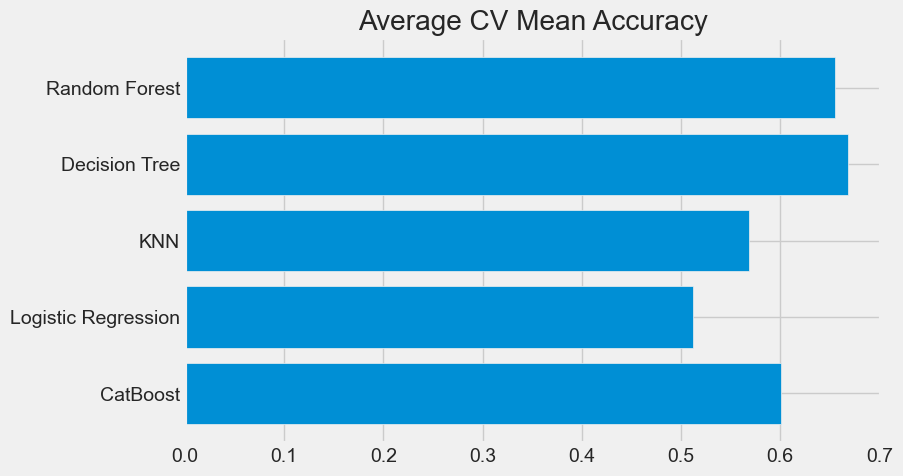

In [118]:

new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- **Purpose and Significance**:
  - **Model Evaluation**: This code evaluates the performance of different classifiers (Random Forest, Logistic Regression, Decision Tree, and CatBoost) using cross-validation.
  
  - **Confusion Matrices**: Visualizes confusion matrices for each model, providing insights into true vs. predicted classifications, which helps in understanding model accuracy and error types.

  - **Classification Reports**: Generates detailed classification reports, including precision, recall, and F1-score, offering a comprehensive view of each model's performance across different metrics.

- **Outcome**: This analysis aids in comparing models, identifying strengths and weaknesses, and selecting the most suitable model for the classification task.

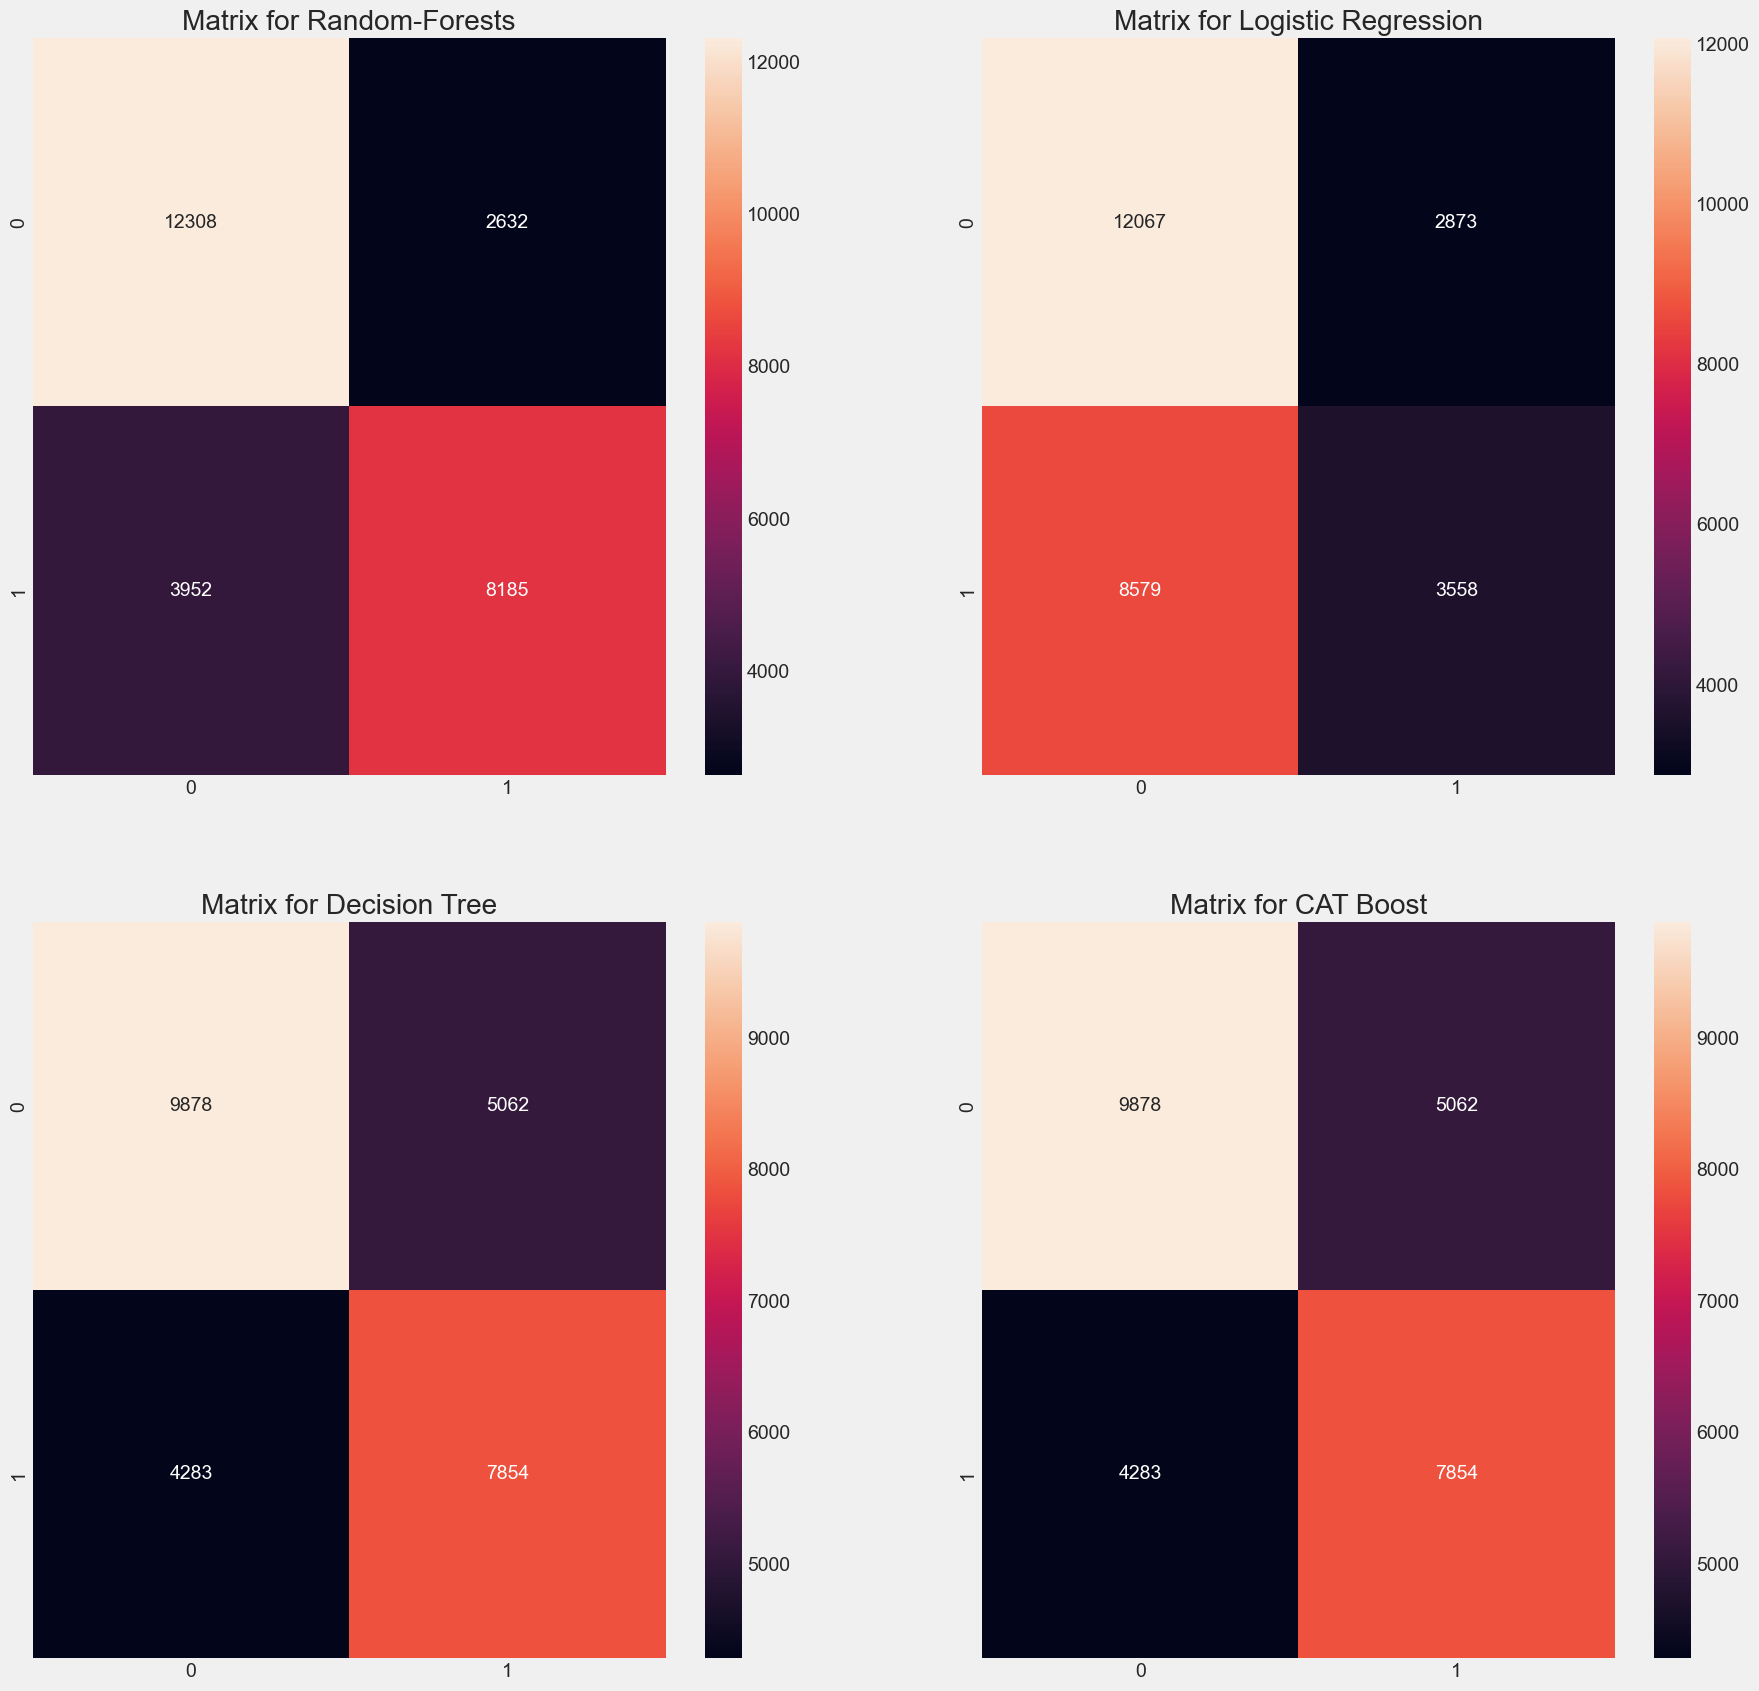

In [119]:
from sklearn.metrics import classification_report
#print(classification_report(Y, y_pred_Cat))


f,ax=plt.subplots(2,2,figsize=(20,20))



y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Random-Forests')
RF_F1 = classification_report(Y, y_pred)

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Logistic Regression')
LR_F1 = classification_report(Y, y_pred)

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Decision Tree')
DT_F1 = classification_report(Y, y_pred)

plt.subplots_adjust(hspace=0.2,wspace=0.2)

ax[1,1].set_title('Matrix for CAT Boost')
y_pred_Cat = cross_val_predict(CatBoostClassifier(verbose=False),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
CAT_F1 = classification_report(Y, y_pred_Cat)


plt.show()

- **Classification Report**: A comprehensive summary of a model's performance, providing key metrics for each class in a classification problem.

- **Metrics Explained**:
  - **Precision**: The ratio of true positive predictions to the total predicted positives. It indicates how many of the predicted positive cases were actually positive.
    - **Formula**: Precision = TP / (TP + FP)
    - **Significance**: High precision means fewer false positives, which is crucial in scenarios where false alarms are costly.

  - **Recall (Sensitivity)**: The ratio of true positive predictions to the actual positives. It measures the model's ability to identify all relevant instances.
    - **Formula**: Recall = TP / (TP + FN)
    - **Significance**: High recall is important in cases where missing a positive case is critical, such as disease detection.

  - **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
    - **Formula**: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
    - **Significance**: Useful when there is an uneven class distribution, as it considers both false positives and false negatives.

  - **Accuracy**: The ratio of correctly predicted instances to the total instances.
    - **Formula**: Accuracy = (TP + TN) / (TP + TN + FP + FN)
    - **Significance**: Provides an overall measure of model performance but can be misleading in imbalanced datasets.

- **Importance**:
  - **Comprehensive Evaluation**: Offers a detailed view of model performance across different aspects, helping to identify strengths and weaknesses.
  - **Informed Decision-Making**: Enables better model selection and tuning by highlighting areas needing improvement.
  - **Balanced Assessment**: Especially important in imbalanced datasets where accuracy alone may not reflect true performance.

- **Use Cases**: Essential in applications like medical diagnosis, fraud detection, and any domain where understanding the trade-offs between false positives and false negatives is critical.

In [120]:
print("==========================================================================")
print("F1 For Random Forest")
print(RF_F1)
print("==========================================================================")
print("F1 For Logistic Regression")
print(LR_F1)
print("==========================================================================")
print("F1 For Decision Tree")
print(DT_F1)
print("==========================================================================")
print("F1 For CatBoost")
print(CAT_F1)
print("==========================================================================")

F1 For Random Forest
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     14940
           1       0.76      0.67      0.71     12137

    accuracy                           0.76     27077
   macro avg       0.76      0.75      0.75     27077
weighted avg       0.76      0.76      0.75     27077

F1 For Logistic Regression
              precision    recall  f1-score   support

           0       0.58      0.81      0.68     14940
           1       0.55      0.29      0.38     12137

    accuracy                           0.58     27077
   macro avg       0.57      0.55      0.53     27077
weighted avg       0.57      0.58      0.55     27077

F1 For Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.66      0.68     14940
           1       0.61      0.65      0.63     12137

    accuracy                           0.65     27077
   macro avg       0.65      0.65      0.65     27077
weigh

### Model Performance Comparison

In this analysis, we compare the performance of four different machine learning models: Random Forest, Logistic Regression, Decision Tree, and CatBoost. The evaluation metrics used are precision, recall, F1-score, and accuracy.

#### Summary of Results

#### Random Forest
- **Precision**: 0.76
- **Recall**: 0.75
- **F1-Score**: 0.75
- **Accuracy**: 0.76

#### Logistic Regression
- **Precision**: 0.57
- **Recall**: 0.55
- **F1-Score**: 0.53
- **Accuracy**: 0.58

#### Decision Tree
- **Precision**: 0.65
- **Recall**: 0.65
- **F1-Score**: 0.65
- **Accuracy**: 0.65

#### CatBoost
- **Precision**: 0.68
- **Recall**: 0.68
- **F1-Score**: 0.68
- **Accuracy**: 0.68

### Conclusion

- **Best Performing Model**: The Random Forest model outperforms the others with the highest accuracy (0.76) and F1-score (0.75). It demonstrates a balanced performance across precision and recall, making it the most effective model for this dataset.

- **Logistic Regression**: This model shows the lowest performance, with an accuracy of 0.58 and an F1-score of 0.53. It struggles particularly with recall for class 1, indicating difficulty in identifying positive cases.

- **Decision Tree**: With an accuracy of 0.65 and an F1-score of 0.65, the Decision Tree model performs moderately well but is less effective than Random Forest.

- **CatBoost**: This model achieves a balanced performance with an accuracy and F1-score of 0.68. It performs better than Logistic Regression and Decision Tree but falls short of Random Forest.

Overall, the Random Forest model is the most suitable choice for this dataset, providing the best balance between precision, recall, and overall accuracy.

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, epochs=50, batch_size=10, verbose=0)

# Standardize the dataset
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', model)
])

# Perform cross-validation
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold, scoring='accuracy')

# Display results
print("Cross-Validation Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Cross-Validation Accuracy: 68.66% (18.26%)


### Neural Network Architecture

The neural network in this code is a simple feedforward model with the following architecture:

1. **Input Layer**: The input layer has a size equal to the number of features in the dataset (`input_dim=X.shape[1]`).

2. **Hidden Layers**:
   - The first hidden layer contains 64 neurons with a ReLU activation function.
   - The second hidden layer contains 32 neurons, also using a ReLU activation function.

3. **Output Layer**: A single neuron with a sigmoid activation function is used for binary classification, outputting a probability between 0 and 1.

4. **Compilation**: The model is compiled with the Adam optimizer and binary cross-entropy loss, suitable for binary classification tasks.

### Suggestions to Improve Accuracy

1. **Increase Model Complexity**: Add more layers or increase the number of neurons in existing layers to capture more complex patterns.

2. **Regularization**: Implement dropout layers to prevent overfitting, especially if the model is too complex.

3. **Hyperparameter Tuning**: Experiment with different learning rates, batch sizes, and epochs to find the optimal configuration.

4. **Feature Engineering**: Enhance the dataset by creating new features or selecting the most relevant ones.

5. **Data Augmentation**: If applicable, augment the dataset to provide more diverse training examples.